Unnamed: 13    2018 A (Rep)
Unnamed: 12    2019 A (Rep)
Unnamed: 11    2020 A (Rep)
Unnamed: 10    2021 A (Rep)
Unnamed: 9     2022 A (Rep)
Unnamed: 8     2023 A (Rep)
Unnamed: 7     2024 A (Fwd)
Unnamed: 6     2025 A (Fwd)
Unnamed: 5     2026 A (Fwd)
Unnamed: 4     2027 A (Fwd)
Name: 1, dtype: object
Unnamed: 4              NaN
Unnamed: 5       73535.1693
Unnamed: 6      66015.51913
Unnamed: 7     58630.342469
Unnamed: 8            57362
Unnamed: 9            51330
Unnamed: 10           38598
Unnamed: 11           20493
Unnamed: 12           56040
Unnamed: 13           54673
Name: 9, dtype: object


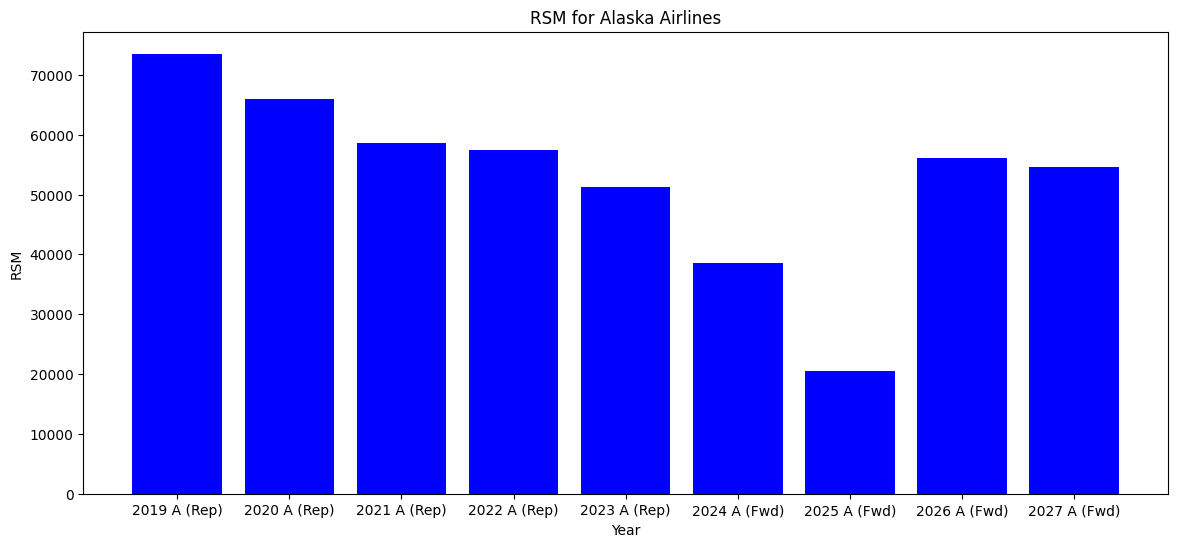

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/Alaska_Airlines.xlsx' 
sheet_name = 'Alaska Airlines' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years= years[::-1]
rpm_alaska = data.iloc[9]
rpm_alaska = rpm_alaska[4:]

print(years)
print(rpm_alaska)

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(years, rpm_alaska, color= 'blue')  # Plotting the index vs. values of that row
plt.title('RSM for Alaska Airlines')
plt.xlabel('Year')
plt.ylabel('RSM')
plt.show()

Unnamed: 13    2019 A (Rep)
Unnamed: 12    2020 A (Rep)
Unnamed: 11    2021 A (Rep)
Unnamed: 10    2022 A (Rep)
Unnamed: 9     2023 A (Rep)
Unnamed: 8     2024 A (Fwd)
Unnamed: 7     2025 A (Fwd)
Unnamed: 6     2026 A (Fwd)
Unnamed: 5     2027 A (Fwd)
Unnamed: 4     2028 A (Fwd)
Name: 1, dtype: object
Unnamed: 8     14.64
Unnamed: 9     15.76
Unnamed: 10    10.47
Unnamed: 11    14.39
Unnamed: 12    11.58
Unnamed: 13    11.66
Name: 22, dtype: object


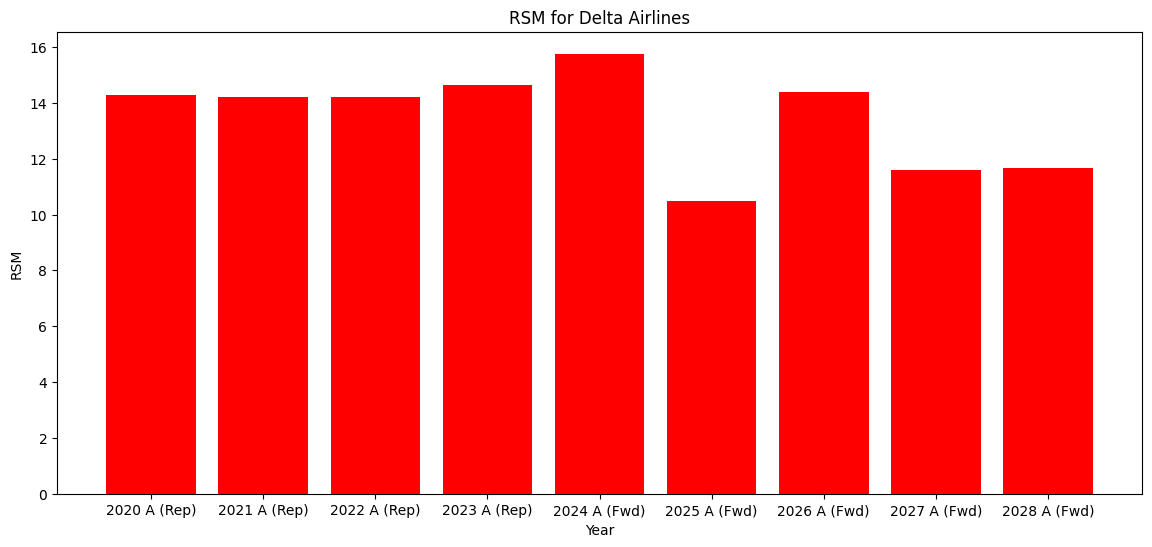

In [54]:
#delta red
file_path = './AirlineFinancials/Delta_Financials.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years= years[::-1]
rpm_delta = data.iloc[9]
rpm_delta = rpm_alaska[4:]

print(years)
print(rpm_delta)

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(years, rpm_alaska, color= 'red')  # Plotting the index vs. values of that row
plt.title('RSM for Delta Airlines')
plt.xlabel('Year')
plt.ylabel('RSM')
plt.show()



Unnamed: 13    2019 A (Rep)
Unnamed: 12    2020 A (Rep)
Unnamed: 11    2021 A (Rep)
Unnamed: 10    2022 A (Rep)
Unnamed: 9     2023 A (Rep)
Unnamed: 8     2024 A (Fwd)
Unnamed: 7     2025 A (Fwd)
Unnamed: 6     2026 A (Fwd)
Unnamed: 5     2027 A (Fwd)
Unnamed: 4     2028 A (Fwd)
Name: 1, dtype: object
Unnamed: 4     46958.385396
Unnamed: 5      42689.44127
Unnamed: 6     38506.716902
Unnamed: 7     34687.114603
Unnamed: 8     31245.982851
Unnamed: 9            30798
Unnamed: 10           25669
Unnamed: 11           20380
Unnamed: 12           11443
Unnamed: 13           24203
Name: 9, dtype: object


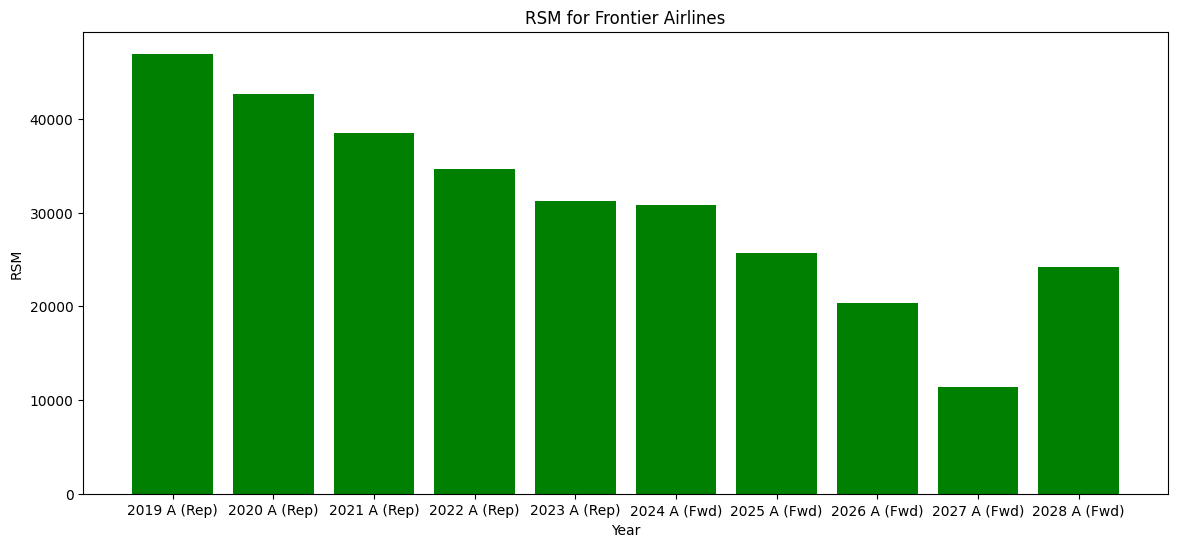

In [53]:
#frontier green

file_path = './AirlineFinancials/Frontier_Financials.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years= years[::-1]
rpm_frontier = data.iloc[9]
rpm_frontier = rpm_frontier[4:]

print(years)
print(rpm_frontier)

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(years, rpm_frontier, color= 'green')  # Plotting the index vs. values of that row
plt.title('RSM for Frontier Airlines')
plt.xlabel('Year')
plt.ylabel('RSM')
plt.show()


Unnamed: 13    2019 A (Rep)
Unnamed: 12    2020 A (Rep)
Unnamed: 11    2021 A (Rep)
Unnamed: 10    2022 A (Rep)
Unnamed: 9     2023 A (Rep)
Unnamed: 8     2024 A (Fwd)
Unnamed: 7     2025 A (Fwd)
Unnamed: 6     2026 A (Fwd)
Unnamed: 5     2027 A (Fwd)
Unnamed: 4     2028 A (Fwd)
Name: 1, dtype: object
Unnamed: 4     60516.150318
Unnamed: 5     58188.606075
Unnamed: 6     58490.235145
Unnamed: 7     55256.544852
Unnamed: 8     54526.126852
Unnamed: 9            56578
Unnamed: 10           52552
Unnamed: 11           41152
Unnamed: 12           18598
Unnamed: 13           53617
Name: 9, dtype: object


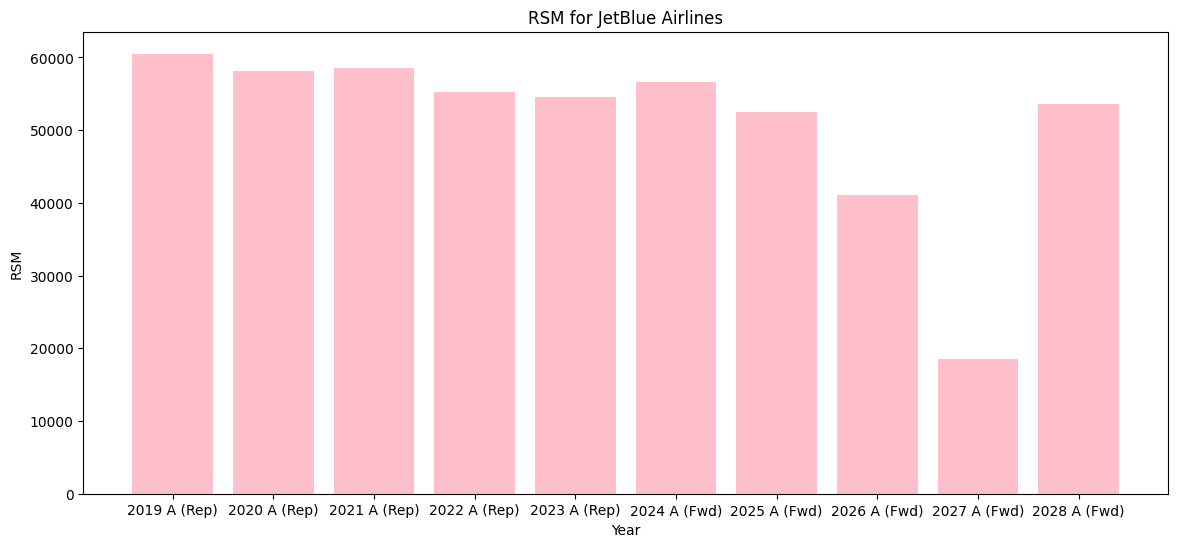

In [52]:
#jetblue is pink

file_path = './AirlineFinancials/JetBlue.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years= years[::-1]
rpm_jetblue = data.iloc[9]
rpm_jetblue = rpm_jetblue[4:]

print(years)
print(rpm_jetblue)

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(years, rpm_jetblue, color= 'pink')  # Plotting the index vs. values of that row
plt.title('RSM for JetBlue Airlines')
plt.xlabel('Year')
plt.ylabel('RSM')
plt.show()

Unnamed: 13    2019 A (Rep)
Unnamed: 12    2020 A (Rep)
Unnamed: 11    2021 A (Rep)
Unnamed: 10    2022 A (Rep)
Unnamed: 9     2023 A (Rep)
Unnamed: 8     2024 A (Fwd)
Unnamed: 7     2025 A (Fwd)
Unnamed: 6     2026 A (Fwd)
Unnamed: 5     2027 A (Fwd)
Unnamed: 4     2028 A (Fwd)
Name: 1, dtype: object
Unnamed: 4     -0.276107
Unnamed: 5      0.442601
Unnamed: 6     -1.155623
Unnamed: 7     -1.516569
Unnamed: 8      2.496673
Unnamed: 9      -2.04499
Unnamed: 10    29.823009
Unnamed: 11   -20.923723
Unnamed: 12    25.021872
Unnamed: 13    -7.374392
Name: 22, dtype: object


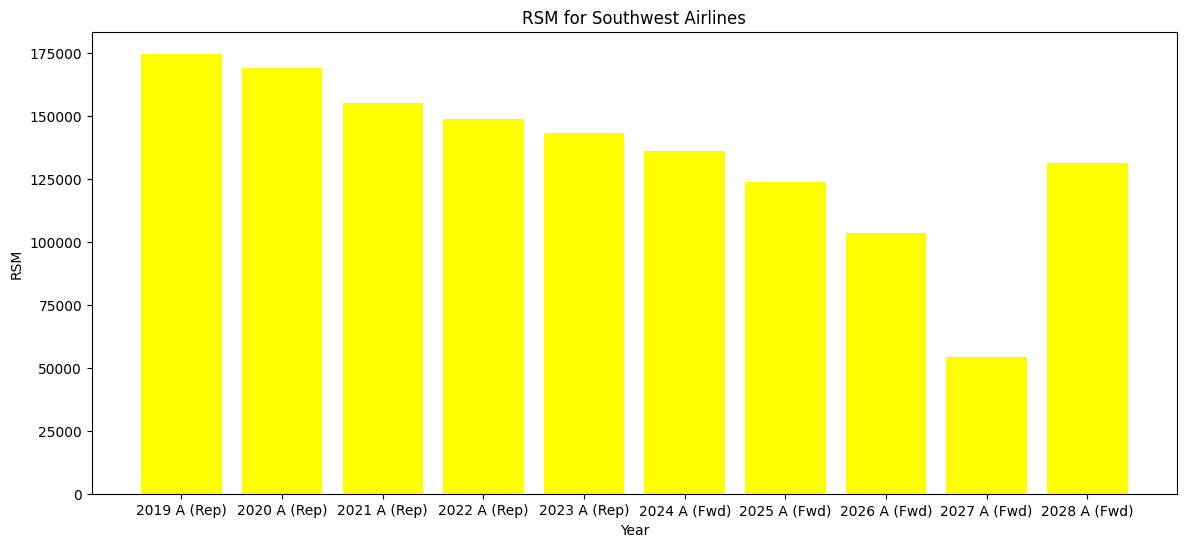

In [51]:
#southwest yellow

file_path = './AirlineFinancials/Southwest Financials-Copy.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years= years[::-1]
rpm_southwest = data.iloc[17]
rpm_southwest = rpm_southwest[4:]

print(years)
print(rpm_jetblue)

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(years, rpm_southwest, color= 'yellow')  # Plotting the index vs. values of that row
plt.title('RSM for Southwest Airlines')
plt.xlabel('Year')
plt.ylabel('RSM')
plt.show()

Unnamed: 13    2019 A (Rep)
Unnamed: 12    2020 A (Rep)
Unnamed: 11    2021 A (Rep)
Unnamed: 10    2022 A (Rep)
Unnamed: 9     2023 A (Rep)
Unnamed: 8     2024 A (Fwd)
Unnamed: 7     2025 A (Fwd)
Unnamed: 6     2026 A (Fwd)
Unnamed: 5     2027 A (Fwd)
Unnamed: 4     2028 A (Fwd)
Name: 1, dtype: object
Unnamed: 4     302527.023253
Unnamed: 5     295800.388502
Unnamed: 6     286126.031097
Unnamed: 7      271481.31007
Unnamed: 8     258410.570902
Unnamed: 9            244435
Unnamed: 10           206791
Unnamed: 11           128979
Unnamed: 12            73883
Unnamed: 13           239360
Name: 17, dtype: object


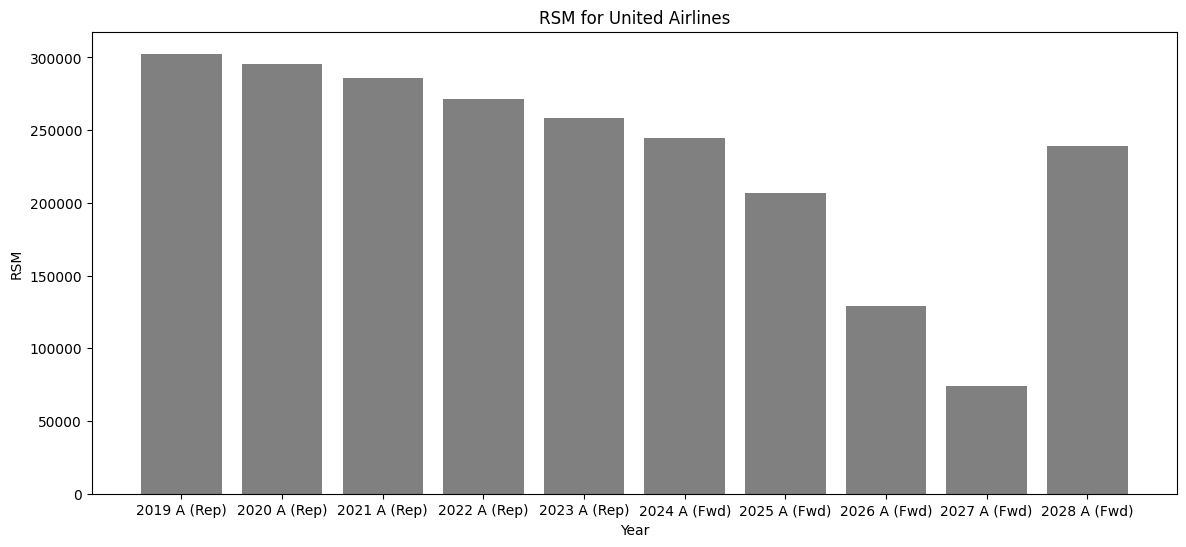

In [49]:
# united grey
file_path = './AirlineFinancials/United_Financials.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years= years[::-1]
rpm_united = data.iloc[17]
rpm_united = rpm_united[4:]

print(years)
print(rpm_united)

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(years, rpm_united, color= 'grey')  # Plotting the index vs. values of that row
plt.title('RSM for United Airlines')
plt.xlabel('Year')
plt.ylabel('RSM')
plt.show()

Unnamed: 13    2019 A (Rep)
Unnamed: 12    2020 A (Rep)
Unnamed: 11    2021 A (Rep)
Unnamed: 10    2022 A (Rep)
Unnamed: 9     2023 A (Rep)
Unnamed: 8     2024 A (Fwd)
Unnamed: 7     2025 A (Fwd)
Unnamed: 6     2026 A (Fwd)
Unnamed: 5     2027 A (Fwd)
Unnamed: 4     2028 A (Fwd)
Name: 1, dtype: object
Unnamed: 4     47901.965644
Unnamed: 5     43547.241495
Unnamed: 6     44235.385386
Unnamed: 7     41986.096459
Unnamed: 8     45086.952507
Unnamed: 9        45243.787
Unnamed: 10       39775.253
Unnamed: 11         32124.2
Unnamed: 12        19319.41
Unnamed: 13       35245.285
Name: 9, dtype: object


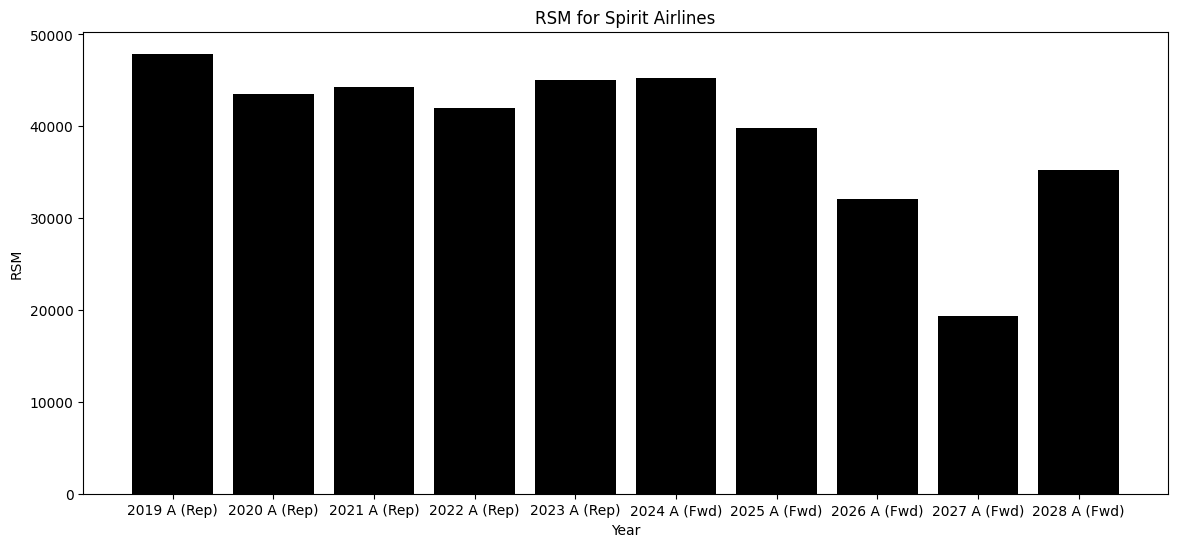

In [48]:
#spirit black
file_path = './AirlineFinancials/Spirit_Financials- Copy.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years= years[::-1]
rpm_spirit = data.iloc[9]
rpm_spirit = rpm_spirit[4:]

print(years)
print(rpm_spirit)

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(years, rpm_spirit, color= 'black')  # Plotting the index vs. values of that row
plt.title('RSM for Spirit Airlines')
plt.xlabel('Year')
plt.ylabel('RSM')
plt.show()